<h2>Library</h2>

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

<h2>Functions</h2>

In [2]:
def y_fmt_k(y, _):
    if y >= 1000:
        value = int(y / 1000)
        return f'{value}k'
    elif y < 1:
        return f'{y:.2f}'
    else:
        return str(int(y))

def calculate_click_rate(df):
    df['Click Rate'] = (df['Clicks'] / df['Impressions']) * 100
    return df

def plot_country_data(df, start_date, end_date, title):
    
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title, fontsize=16)

    date_range = pd.date_range(start=start_date, end=end_date)  # Calculate the date range
    date_interval = len(date_range) // 10  # Adjust this number for desired intervals

    df_reach = df.groupby(['Date', 'Provider'])['Reach'].sum().reset_index()
    df_impressions = df.groupby(['Date', 'Provider'])['Impressions'].sum().reset_index()
    df_frequency = df.groupby(['Date', 'Provider'])['Frequency'].sum().reset_index()
    df_clicks = df.groupby(['Date', 'Provider'])['Clicks'].sum().reset_index()
    
    # Calculate the click rate
    df = calculate_click_rate(df)
    df_click_rate = df.groupby(['Date', 'Provider'])['Click Rate'].mean().reset_index()

    sns.lineplot(data=df_reach, x='Date', y='Reach', hue='Provider', ax=axes[0])
    sns.lineplot(data=df_impressions, x='Date', y='Impressions', hue='Provider', ax=axes[1])
    sns.lineplot(data=df_frequency, x='Date', y='Frequency', hue='Provider', ax=axes[2])
    sns.lineplot(data=df_clicks, x='Date', y='Clicks', hue='Provider', ax=axes[3])
    sns.lineplot(data=df_click_rate, x='Date', y='Click Rate', hue='Provider', ax=axes[4])

    for ax in axes:
        ax.set_xlabel('Date', fontsize=8)
        ax.set_ylabel('Value', fontsize=8)
        ax.legend(fontsize=6)
        ax.tick_params(axis='both', labelsize=8)
        ax.tick_params(axis='x', rotation=45)

        ax.xaxis.set_minor_formatter(mdates.DateFormatter(fmt=''))

        # Set the major locator with an automatic date interval
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=date_interval))
        ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%b-%d'))

        ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_k))

    axes[0].set_title('Reach', fontsize=10)
    axes[1].set_title('Impressions', fontsize=10)
    axes[2].set_title('Frequency', fontsize=10)
    axes[3].set_title('Clicks', fontsize=10)
    axes[4].set_title('Click Rate', fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage:
# plot_country_data(your_df, "Title")


<h2>Flight Dates</h2>

AU: 2023-09-19<br>
BR: 2023-09-04<br>
CA: 2023-09-01<br>
FR: 2023-08-12<br>

<h2>Calendar</h2>

In [3]:
folder_path = r'..\..\..\Dell-Projects\Helper\Calendar.csv'

calendar = pd.read_csv(folder_path, parse_dates=['Date'])

<h2>Dataset</h2>

In [4]:
df = pd.read_csv(r'csv\df.csv', parse_dates=['Date'])

In [5]:
df['Country'].unique()

array(['FR', 'CA', 'BR', 'AU'], dtype=object)

In [6]:
# Filter data for AU, BR, CA & FR
df_au = df[df['Country'].str.contains('AU', na=False)]
df_br = df[df['Country'].str.contains('BR', na=False)]
df_ca = df[df['Country'].str.contains('CA', na=False)]
df_fr = df[df['Country'].str.contains('FR', na=False)]

In [7]:
merged_df_au = pd.merge(calendar, df_au, on=['Date'], how='left').fillna(0)
merged_df_br = pd.merge(calendar, df_br, on=['Date'], how='left').fillna(0)
merged_df_ca = pd.merge(calendar, df_ca, on=['Date'], how='left').fillna(0)
merged_df_fr = pd.merge(calendar, df_fr, on=['Date'], how='left').fillna(0)

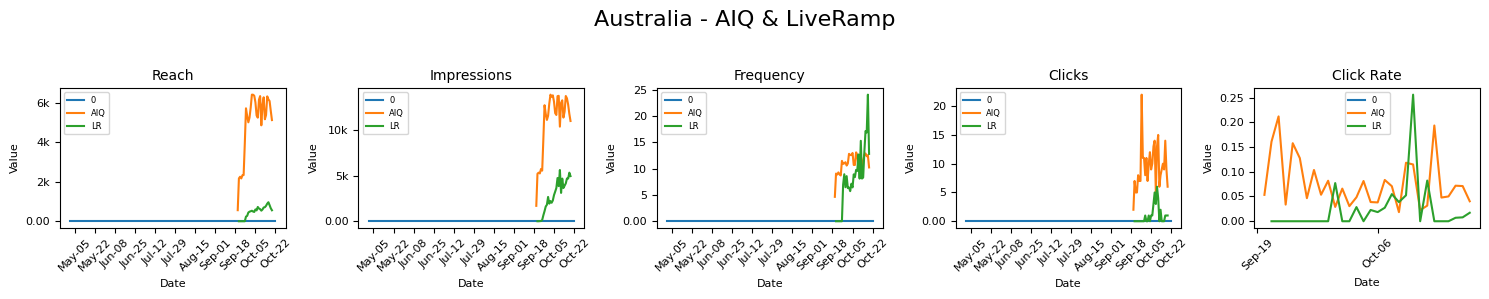

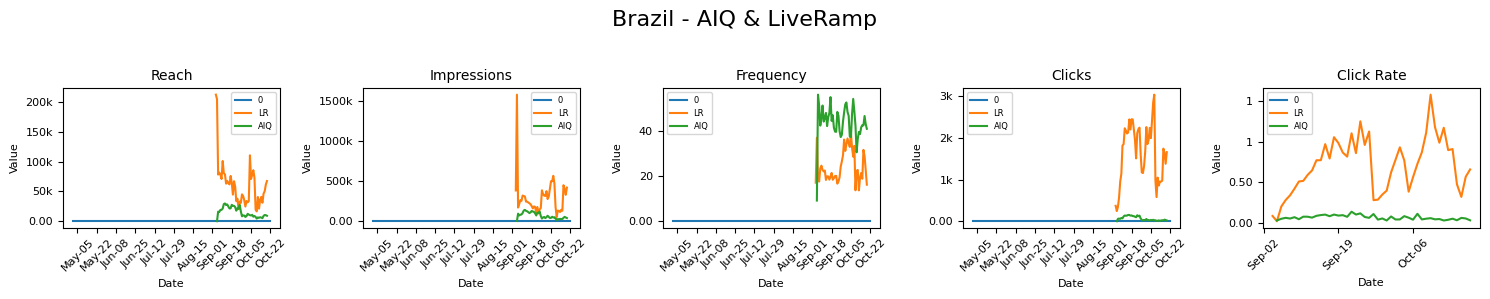

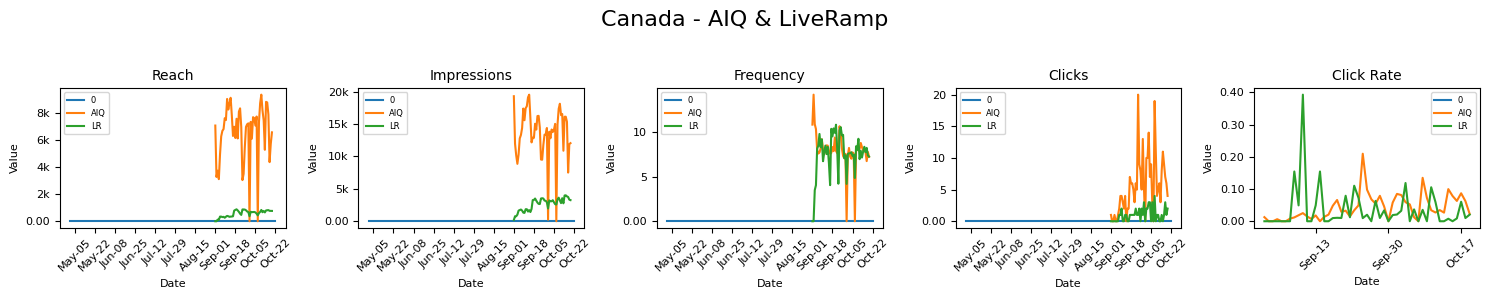

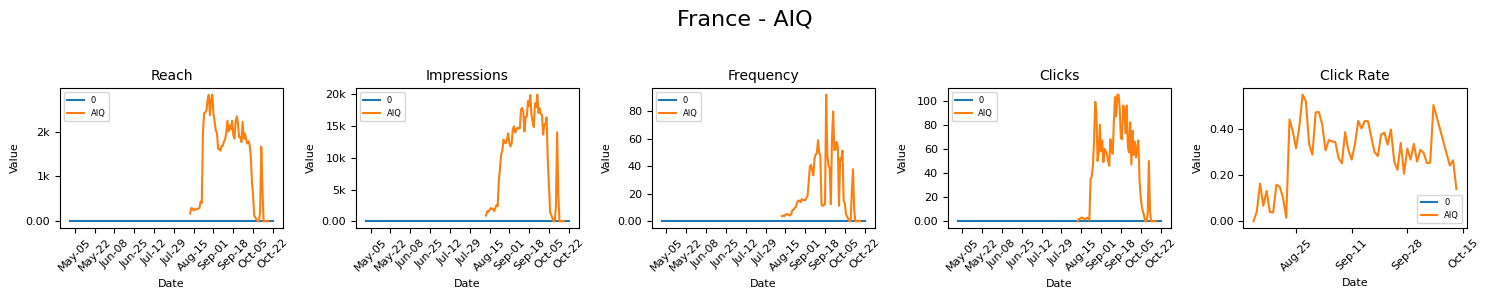

In [8]:
# Plot data
plot_country_data(merged_df_au, '2023-09-01', '2023-10-22', 'Australia - AIQ & LiveRamp')
plot_country_data(merged_df_br, '2023-09-01', '2023-10-22', 'Brazil - AIQ & LiveRamp')
plot_country_data(merged_df_ca, '2023-09-01', '2023-10-22', 'Canada - AIQ & LiveRamp')
plot_country_data(merged_df_fr, '2023-09-01', '2023-10-22', 'France - AIQ')